In [1]:
from torch import nn, optim
from torch.nn import Linear
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

torch.manual_seed(1)

In [2]:
model = Linear(in_features=2, out_features=1)

In [3]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121]], requires_grad=True),
 Parameter containing:
 tensor([-0.1371], requires_grad=True)]

In [4]:
x = torch.tensor([1.0, 3.0])

In [5]:
yhat = model(x)

yhat

tensor([-0.7090], grad_fn=<ViewBackward0>)

In [6]:
x = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
yhat = model(x)
yhat

tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward0>)

In [7]:
class LR(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

In [8]:
class Data2D(Dataset):

    # Constructor
    def __init__(self):
            self.x = torch.zeros(20, 2)
            self.x[:, 0] = torch.arange(-1, 1, 0.1)
            self.x[:, 1] = torch.arange(-1, 1, 0.1)
            self.w = torch.tensor([[1.0], [1.0]])
            self.b = 1
            self.f = torch.mm(self.x, self.w) + self.b
            self.y = self.f + (0.1 * torch.randn(self.x.shape[0], 1))
            self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

In [9]:
data_set = Data2D()
criterion = nn.MSELoss()
dataloader = DataLoader(dataset=data_set, batch_size=2)
model = LR(input_size=2, output_size=1)
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [10]:
for epoch in range(100):
  for x, y in dataloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [11]:
model = LR(input_size=2, output_size=2)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2970, -0.0205],
         [-0.3586,  0.0162]], requires_grad=True),
 Parameter containing:
 tensor([-0.6646, -0.4998], requires_grad=True)]

In [12]:
x = torch.tensor([1.0, 2.0])
yhat = model(x)
yhat

tensor([-0.4086, -0.8260], grad_fn=<ViewBackward0>)

In [13]:
x = torch.tensor([[1.0, 2.0], [1.0, 2.0], [1.0, 3.0]])
yhat = model(x)
yhat

tensor([[-0.4086, -0.8260],
        [-0.4086, -0.8260],
        [-0.4291, -0.8098]], grad_fn=<AddmmBackward0>)

In [14]:
data_set = Data2D()
criterion = nn.MSELoss()
dataloader = DataLoader(dataset=data_set, batch_size=2)
model = LR(input_size=2, output_size=2)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [15]:
for epoch in range(100):
  for x, y in dataloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [16]:
z = torch.arange(-100, 100, 0.1).view(-1, 1)
print(z)

tensor([[-100.0000],
        [ -99.9000],
        [ -99.8000],
        ...,
        [  99.7000],
        [  99.8000],
        [  99.9000]])


In [17]:
sig = nn.Sigmoid()
yhat = sig(z)

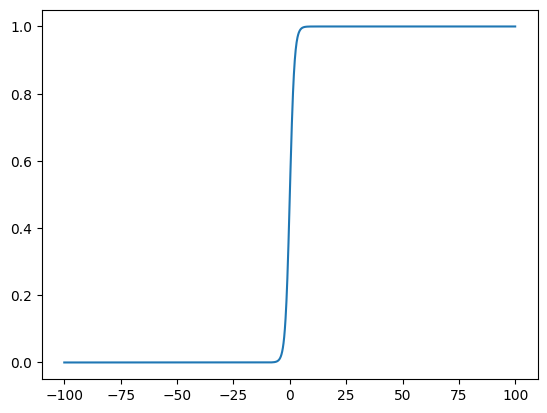

In [18]:
plt.plot(z.numpy(), yhat.numpy())

In [19]:
model = nn.Sequential(nn.Linear(1,1), nn.Sigmoid())
list(model.parameters())

[Parameter containing:
 tensor([[0.3600]], requires_grad=True),
 Parameter containing:
 tensor([-0.3540], requires_grad=True)]

In [20]:
x = torch.tensor([1.0])
yhat = model(x)
yhat

tensor([0.5015], grad_fn=<SigmoidBackward0>)